In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Load the data sample
df = pd.read_csv('../datastore/data.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# number of rows and columns
df.shape

(4078318, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

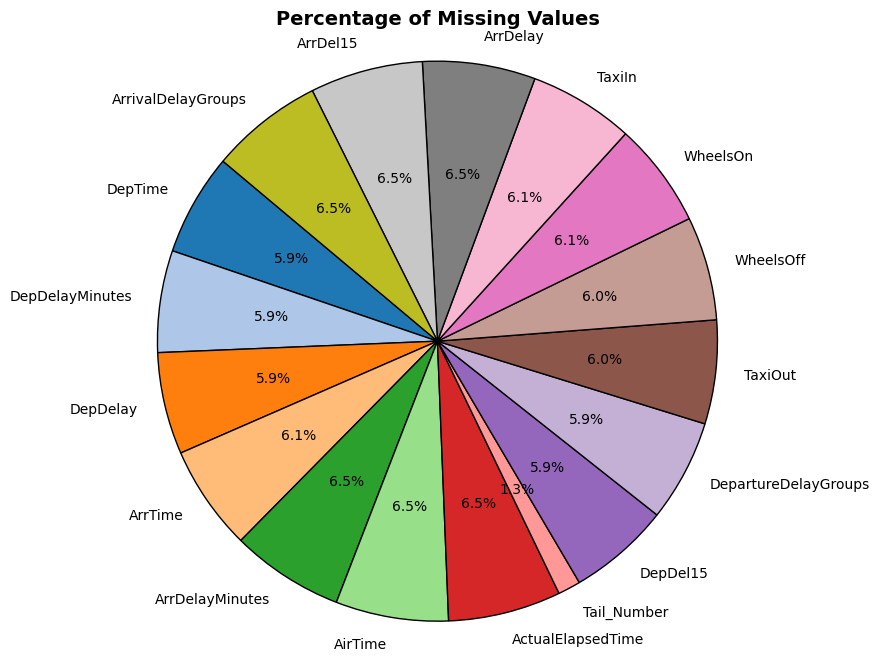

In [14]:
import matplotlib.pyplot as plt

# Step 1: Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Step 2: Filter out columns with no missing values
missing_percent = missing_percent[missing_percent > 0]

# Step 3: Plot the pie chart with minimalistic style and custom colors
plt.figure(figsize=(10, 8))

# Define custom colors
colors = plt.get_cmap('tab20').colors

plt.pie(
    missing_percent, 
    labels=missing_percent.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Percentage of Missing Values', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

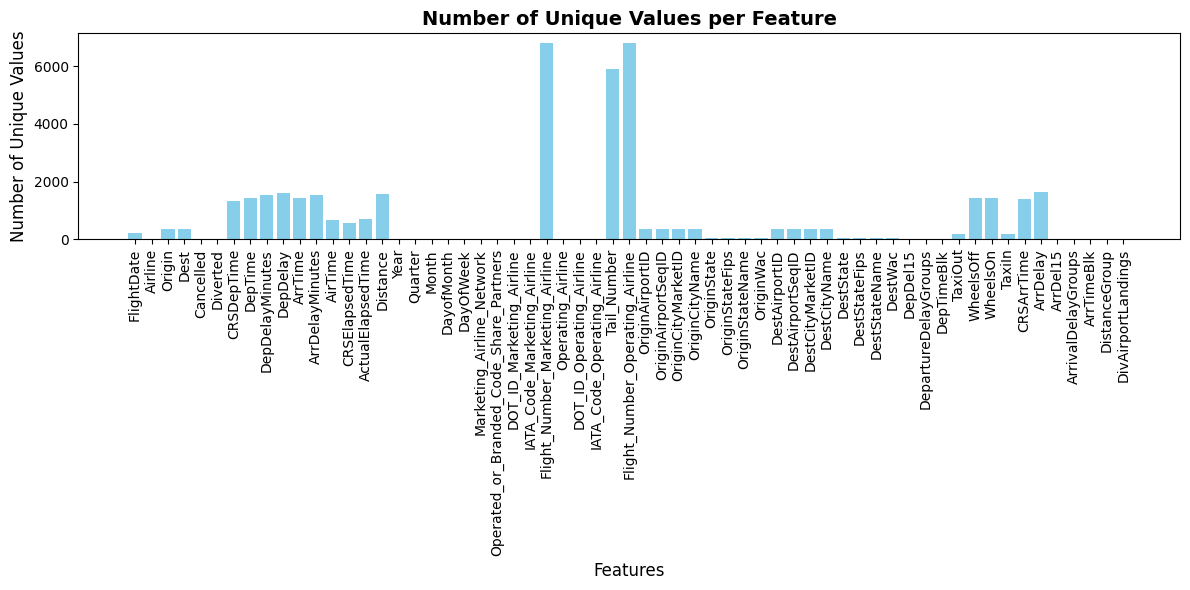

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the number of unique values for each feature
unique_values = df.nunique()

# Step 2: Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(unique_values.index, unique_values.values, color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.title('Number of Unique Values per Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_small = df.sample(frac=0.2)

In [4]:
df_small.shape 

(815664, 61)

In [14]:
required_columns = [
    "Cancelled", "CRSArrTime", "CRSDepTime", "CRSElapsedTime", "Quarter", 
    "Month", "DayofMonth", "DayOfWeek", "Origin", "OriginStateFips", 
    "OriginWac", "Dest", "DestStateFips", "DestWac", "Distance", "Airline", 
    "Operating_Airline", "IATA_Code_Marketing_Airline", 
    "IATA_Code_Operating_Airline", "Marketing_Airline_Network", 
    "Operated_or_Branded_Code_Share_Partners"
]

# Filter the DataFrame to include only the required columns
filtered_df = df_small[required_columns]

# Display the filtered DataFrame
filtered_df 

,Cancelled,CRSArrTime,CRSDepTime,CRSElapsedTime,Quarter,Month,DayofMonth,DayOfWeek,Origin,OriginStateFips,OriginWac,Dest,DestStateFips,DestWac,Distance,Airline,Operating_Airline,IATA_Code_Marketing_Airline,IATA_Code_Operating_Airline,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners
1203276,False,1456,1211,165.0,3,7,24,7,FLL,12,33,CLE,39,44,1062.0,United Air Lines Inc.,UA,UA,UA,UA,UA
1655718,False,1105,940,85.0,3,7,30,6,SMF,6,91,LGB,6,91,387.0,Southwest Airlines Co.,WN,WN,WN,WN,WN
3404258,False,645,519,86.0,1,1,12,3,GEG,53,93,SEA,53,93,224.0,SkyWest Airlines Inc.,OO,DL,OO,DL,DL_CODESHARE
3820045,False,2237,2105,92.0,1,3,16,3,SAN,6,91,SFO,6,91,447.0,SkyWest Airlines Inc.,OO,AS,OO,AS,AS_CODESHARE
458670,False,1355,1236,139.0,2,4,29,5,RIC,51,38,ORD,17,41,642.0,SkyWest Airlines Inc.,OO,UA,OO,UA,UA_CODESHARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785216,False,1503,1325,158.0,1,3,20,7,CLT,37,36,SHV,22,72,764.0,Comair Inc.,OH,AA,OH,AA,AA_CODESHARE
529498,False,801,2340,321.0,2,4,10,7,SMF,6,91,EWR,34,21,2500.0,United Air Lines Inc.,UA,UA,UA,UA,UA
1116590,False,742,615,87.0,3,7,13,3,SAN,6,91,SJC,6,91,417.0,SkyWest Airlines Inc.,OO,AS,OO,AS,AS_CODESHARE
1701409,False,1315,1114,121.0,3,7,21,4,CVG,21,52,LGA,36,22,585.0,Republic Airlines,YX,AA,YX,AA,AA_CODESHARE


In [12]:
df_small

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1203276,2022-07-24,United Air Lines Inc.,FLL,CLE,False,False,1211,1206.0,0.0,-5.0,1455.0,0.0,139.0,165.0,169.0,1062.0,2022,3,7,24,7,UA,UA,19977,UA,1975,UA,19977,UA,N33294,1975,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,11042,1104205,30647,"Cleveland, OH",OH,39,Ohio,44,0.0,-1.0,1200-1259,22.0,1228.0,1447.0,8.0,1456,-1.0,0.0,-1.0,1400-1459,5,0
1655718,2022-07-30,Southwest Airlines Co.,SMF,LGB,False,False,940,940.0,0.0,0.0,1057.0,0.0,64.0,85.0,77.0,387.0,2022,3,7,30,6,WN,WN,19393,WN,3746,WN,19393,WN,N476WN,3746,14893,1489302,33192,"Sacramento, CA",CA,6,California,91,12954,1295407,32575,"Long Beach, CA",CA,6,California,91,0.0,0.0,0900-0959,10.0,950.0,1054.0,3.0,1105,-8.0,0.0,-1.0,1100-1159,2,0
3404258,2022-01-12,SkyWest Airlines Inc.,GEG,SEA,False,False,519,516.0,0.0,-3.0,616.0,0.0,46.0,86.0,60.0,224.0,2022,1,1,12,3,DL,DL_CODESHARE,19790,DL,3515,OO,20304,OO,N279SY,3515,11884,1188402,31884,"Spokane, WA",WA,53,Washington,93,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,0.0,-1.0,0001-0559,10.0,526.0,612.0,4.0,645,-29.0,0.0,-2.0,0600-0659,1,0
3820045,2022-03-16,SkyWest Airlines Inc.,SAN,SFO,False,False,2105,2102.0,0.0,-3.0,2233.0,0.0,72.0,92.0,91.0,447.0,2022,1,3,16,3,AS,AS_CODESHARE,19930,AS,3454,OO,20304,OO,N192SY,3454,14679,1467903,33570,"San Diego, CA",CA,6,California,91,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,0.0,-1.0,2100-2159,15.0,2117.0,2229.0,4.0,2237,-4.0,0.0,-1.0,2200-2259,2,0
458670,2022-04-29,SkyWest Airlines Inc.,RIC,ORD,False,False,1236,1241.0,5.0,5.0,1405.0,10.0,109.0,139.0,144.0,642.0,2022,2,4,29,5,UA,UA_CODESHARE,19977,UA,5759,OO,20304,OO,N168SY,5759,14524,1452401,34524,"Richmond, VA",VA,51,Virginia,38,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.0,0.0,1200-1259,24.0,1305.0,1354.0,11.0,1355,10.0,0.0,0.0,1300-1359,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785216,2022-03-20,Comair Inc.,CLT,SHV,False,False,1325,1317.0,0.0,-8.0,1458.0,0.0,126.0,158.0,161.0,764.0,2022,1,3,20,7,AA,AA_CODESHARE,19805,AA,5262,OH,20397,OH,N709PS,5262,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,14814,1481402,30476,"Shreveport, LA",LA,22,Louisiana,72,0.0,-1.0,1300-1359,31.0,1348.0,1454.0,4.0,1503,-5.0,0.0,-1.0,1500-1559,4,0
529498,2022-04-10,United Air Lines Inc.,SMF,EWR,False,False,2340,2348.0,8.0,8.0,747.0,0.0,281.0,321.0,299.0,2500.0,2022,2,4,10,7,UA,UA,19977,UA,2185,UA,19977,UA,N461UA,2185,14893,1489302,33192,"Sacramento, CA",CA,6,California,91,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0.0,0.0,2300-2359,10.0,2358.0,739.0,8.0,801,-14.0,0.0,-1.0,0800-0859,11,0
1116590,2022-07-13,SkyWest Airlines Inc.,SAN,SJC,False,False,615,610.0,0.0,-5.0,734.0,0.0,59.0,87.0,84.0,417.0,2022,3,7,13,3,AS,AS_CODESHARE,19930,AS,3351,OO,20304,OO,N171SY,3351,14679,1467903,33570,"San Diego, CA",CA,6,California,91,14831,1483106,32457,"San Jose, CA",CA,6,California,91,0.0,-1.0,0600-0659,21.0,631.0,730.0,4.0,742,-8.0,0.0,-1.0,070

In [6]:
from src.data import preprocess_data

In [ ]:
from omegaconf import OmegaConf


cfg = OmegaConf.load('../configs/data_transformations.yaml')
X,y = preprocess_data(df=df_small,cfg=cfg)

In [8]:
X

,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,OriginStateFips,OriginWac,DestStateFips,DestWac,CRSArrTime,Quarter_sin,Quarter_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos,CRSArrTime_HH,CRSArrTime_MM,CRSArrTime_HH_sin,CRSArrTime_HH_cos,CRSArrTime_MM_sin,CRSArrTime_MM_cos,CRSDepTime_HH,CRSDepTime_MM,CRSDepTime_HH_sin,CRSDepTime_HH_cos,CRSDepTime_MM_sin,CRSDepTime_MM_cos,CRSElapsedTime_HH,CRSElapsedTime_MM,CRSElapsedTime_HH_sin,CRSElapsedTime_HH_cos,CRSElapsedTime_MM_sin,CRSElapsedTime_MM_cos
1203276,561,110,656,1211,165.0,1062.0,3,7,24,7,841,841,841,841,841,12,33,39,44,1456,-1.000000e+00,-1.000000e+00,-0.500000,-0.500000,-0.988468,-0.988468,-2.449294e-16,-2.449294e-16,14,56,-0.500000,-0.500000,-0.406737,-0.406737,12,11,1.224647e-16,1.224647e-16,0.913545,0.913545,1.0,65.0,0.258819,0.258819,0.500000,0.500000
1655718,385,608,64,940,85.0,387.0,3,7,30,6,683,683,683,683,683,6,91,6,91,1105,-1.000000e+00,-1.000000e+00,-0.500000,-0.500000,-0.201299,-0.201299,-7.818315e-01,-7.818315e-01,11,5,0.258819,0.258819,0.500000,0.500000,9,40,7.071068e-01,7.071068e-01,-0.866025,-0.866025,0.0,85.0,0.000000,0.000000,0.500000,0.500000
3404258,474,188,378,519,86.0,224.0,1,1,12,3,355,89,355,118,118,53,93,53,93,645,1.000000e+00,1.000000e+00,0.500000,0.500000,0.651372,0.651372,4.338837e-01,4.338837e-01,6,45,1.000000,1.000000,-1.000000,-1.000000,5,19,9.659258e-01,9.659258e-01,0.913545,0.913545,0.0,86.0,0.000000,0.000000,0.406737,0.406737
3820045,474,583,62,2105,92.0,447.0,1,3,16,3,935,448,935,118,118,6,91,6,91,2237,1.000000e+00,1.000000e+00,1.000000,1.000000,-0.101168,-0.101168,4.338837e-01,4.338837e-01,22,37,-0.500000,-0.500000,-0.669131,-0.669131,21,5,-7.071068e-01,-7.071068e-01,0.500000,0.500000,0.0,92.0,0.000000,0.000000,-0.207912,-0.207912
458670,474,344,241,1236,139.0,642.0,2,4,29,5,841,405,841,118,118,51,38,17,41,1355,1.224647e-16,1.224647e-16,0.866025,0.866025,-0.394356,-0.394356,-9.749279e-01,-9.749279e-01,13,55,-0.258819,-0.258819,-0.500000,-0.500000,12,36,1.224647e-16,1.224647e-16,-0.587785,-0.587785,1.0,39.0,0.258819,0.258819,-0.809017,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785216,760,759,579,1325,158.0,764.0,1,3,20,7,854,578,854,676,676,37,36,22,72,1503,1.000000e+00,1.000000e+00,1.000000,1.000000,-0.790776,-0.790776,-2.449294e-16,-2.449294e-16,15,3,-0.707107,-0.707107,0.309017,0.309017,13,25,-2.588190e-01,-2.588190e-01,0.500000,0.500000,1.0,58.0,0.258819,0.258819,-0.207912,-0.207912
529498,561,608,639,2340,321.0,2500.0,2,4,10,7,841,841,841,841,841,6,91,34,21,801,1.224647e-16,1.224647e-16,0.866025,0.866025,0.897805,0.897805,-2.449294e-16,-2.449294e-16,8,1,0.866025,0.866025,0.104528,0.104528,23,40,-2.588190e-01,-2.588190e-01,-0.866025,-0.866025,3.0,21.0,0.707107,0.707107,0.809017,0.809017
1116590,474,583,793,615,87.0,417.0,3,7,13,3,935,448,935,118,118,6,91,6,91,742,-1.000000e+00,-1.000000e+00,-0.500000,-0.500000,0.485302,0.485302,4.338837e-01,4.338837e-01,7,42,0.965926,0.965926,-0.951057,-0.951057,6,15,1.000000e+00,1.000000e+00,1.000000,1.000000,0.0,87.0,0.000000,0.000000,0.309017,0.309017
1701409,755,496,853,1114,121.0,585.0,3,7,21,4,854,578,854,920,920,21,52,36,22,1315,-1.000000e+00,-1.000000e+00,-0.500000,-0.500000,-0.897805,-0.897805,-4.338837e-01,-4.338837e-01,13,15,-0.258819,-0.258819,1.000000,1.000000,11,14,2.588190e-01,2.588190e-01,0.994522,0.994522,1.0,21.0,0.258819,0.258819,0.809017,0.809017


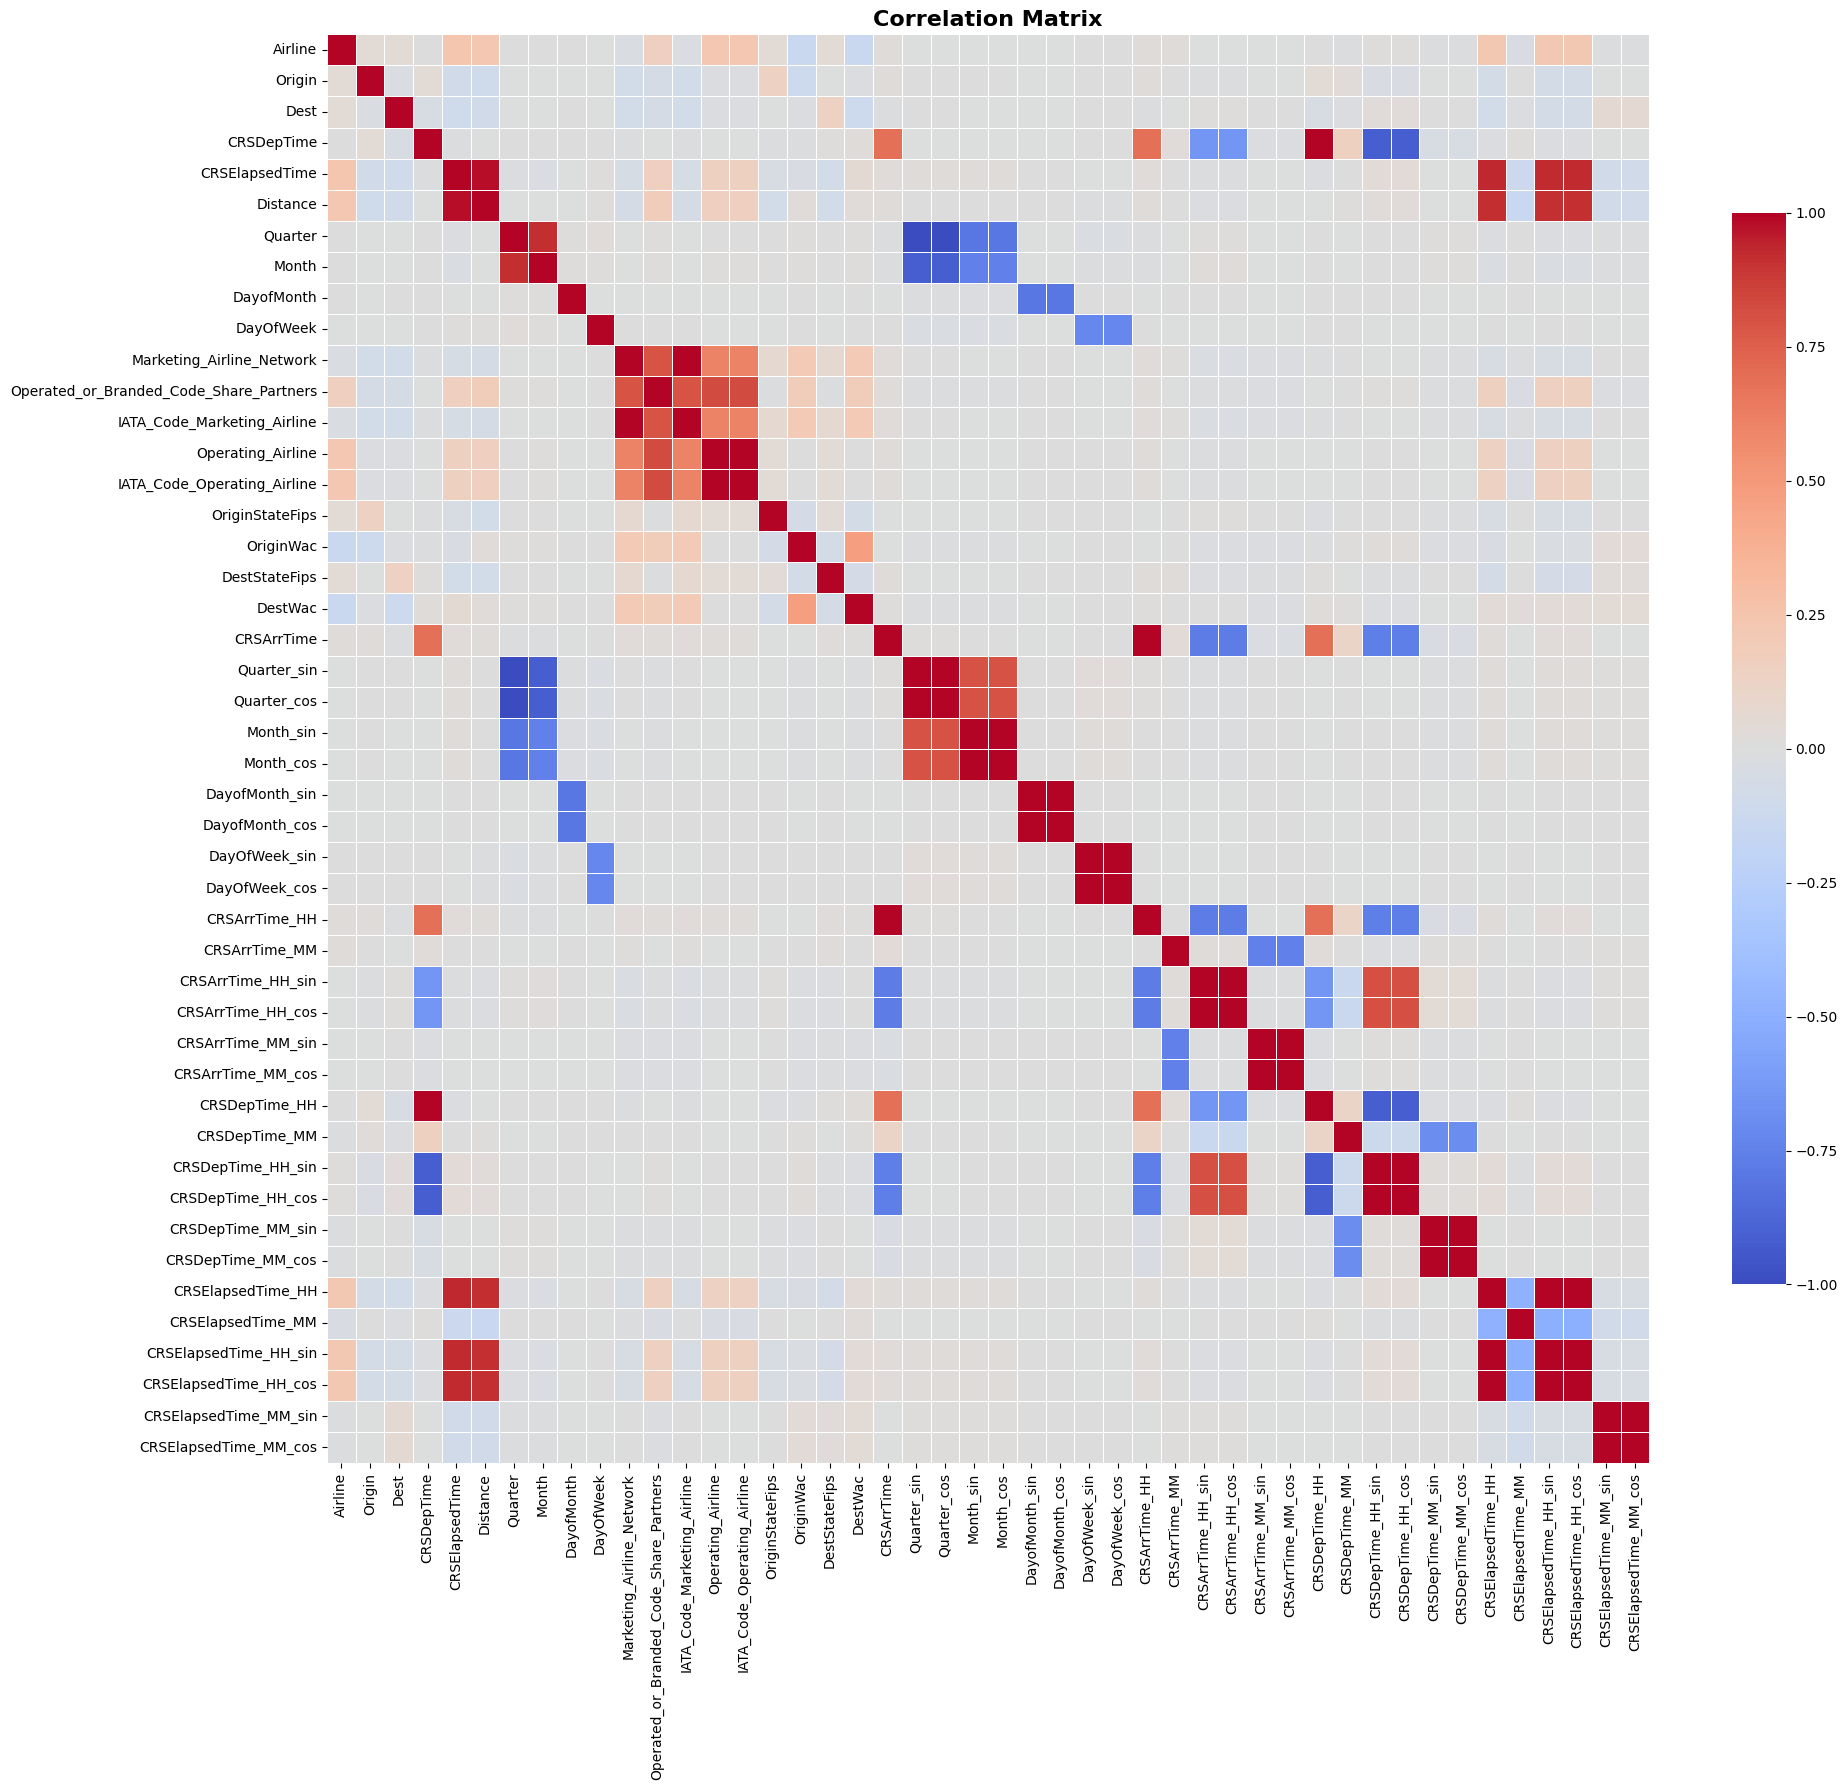

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns
numeric_df = X.select_dtypes(include=[float, int])

# Step 2: Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

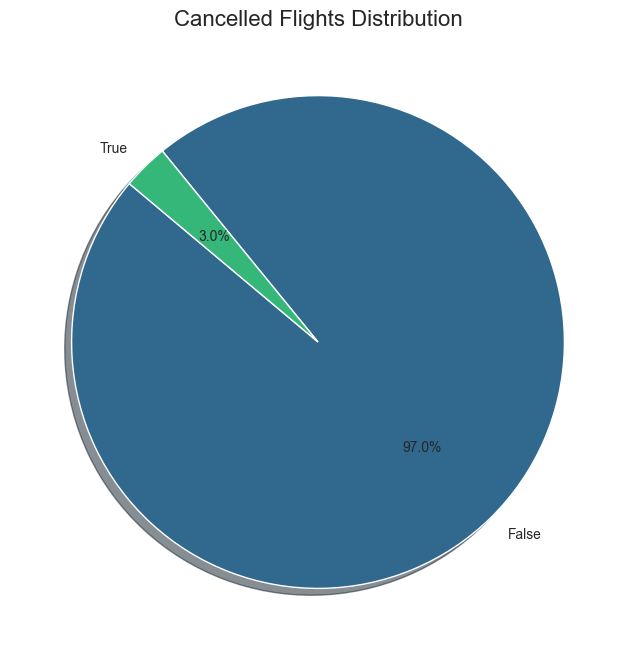

In [11]:
import matplotlib.pyplot as plt

# Assuming y is a DataFrame with a column 'Cancelled'
# y = pd.DataFrame({'Cancelled': [...]})

# Calculate the counts of each unique value in the 'Cancelled' column
cancelled_counts = y['Cancelled'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette('viridis', len(cancelled_counts)), shadow=True, startangle=140)

# Customize the plot
plt.title('Cancelled Flights Distribution', fontsize=16)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y is your target variable and X is your feature DataFrame
# y = pd.Series([...])
# X = pd.DataFrame({...})

# Calculate the correlation between y and each feature in X
correlations = X.corrwith(y)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation between Target and Each Feature')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()